In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("taxi_trip_pricing.csv")
dataset.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
dataset.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [6]:
dataset.shape

(1000, 11)

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [8]:
numeric_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 
                   'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

for column in numeric_columns:
    dataset[column].fillna(dataset[column].median(), inplace=True)


categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for column in categorical_columns:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

print(dataset.isnull().sum())

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


In [9]:
dataset["Time_of_Day"].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

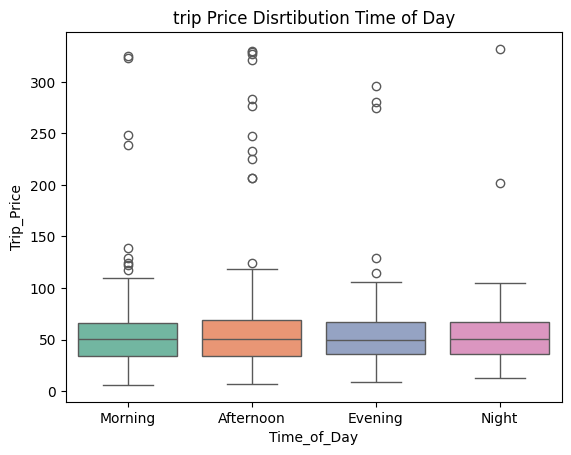

In [10]:
sns.boxplot(x="Time_of_Day",y="Trip_Price",data=dataset,palette="Set2")
plt.title("trip Price Disrtibution Time of Day")
plt.show()

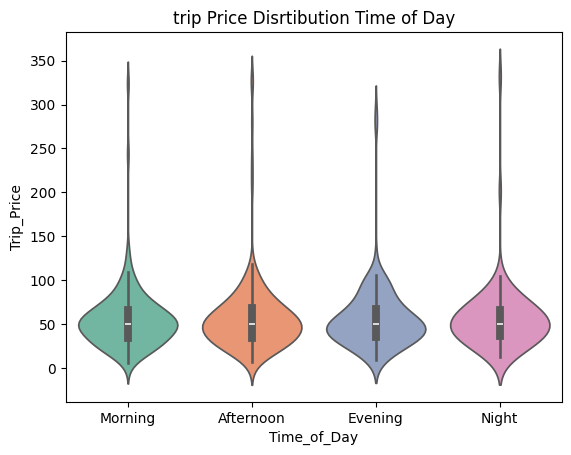

In [11]:
sns.violinplot(x="Time_of_Day",y="Trip_Price",data=dataset,palette="Set2")
plt.title("trip Price Disrtibution Time of Day")
plt.show()

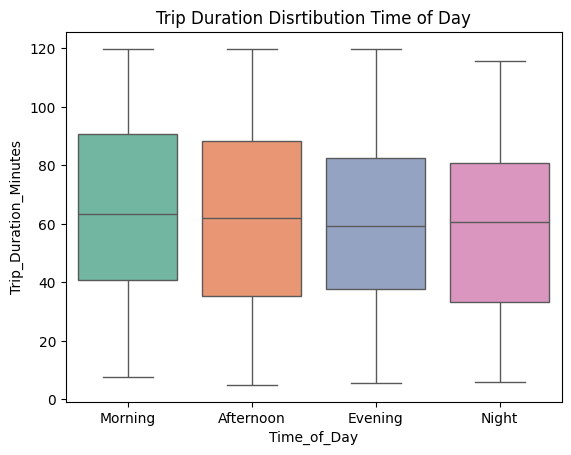

In [12]:
sns.boxplot(x="Time_of_Day",y="Trip_Duration_Minutes",data=dataset,palette="Set2")
plt.title("Trip Duration Disrtibution Time of Day")
plt.show()

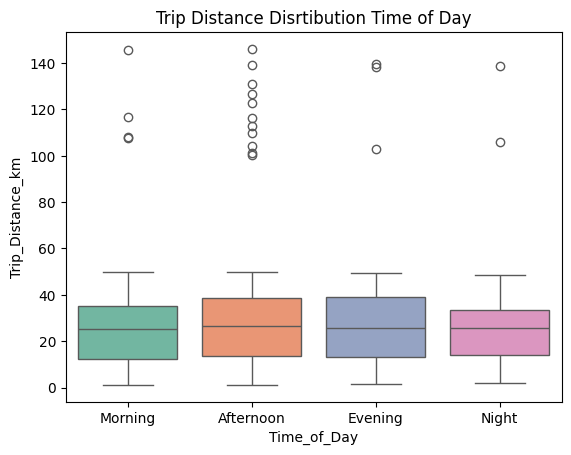

In [13]:
sns.boxplot(x="Time_of_Day",y="Trip_Distance_km",data=dataset,palette="Set2")
plt.title("Trip Distance Disrtibution Time of Day")
plt.show()

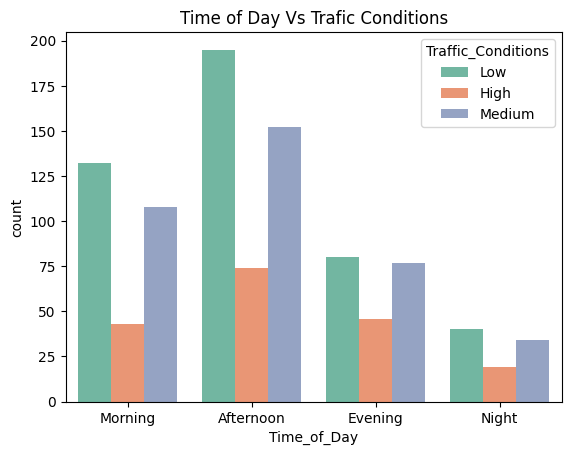

In [14]:
sns.countplot(x="Time_of_Day",hue="Traffic_Conditions",data=dataset,palette="Set2")
plt.title("Time of Day Vs Trafic Conditions")
plt.show()

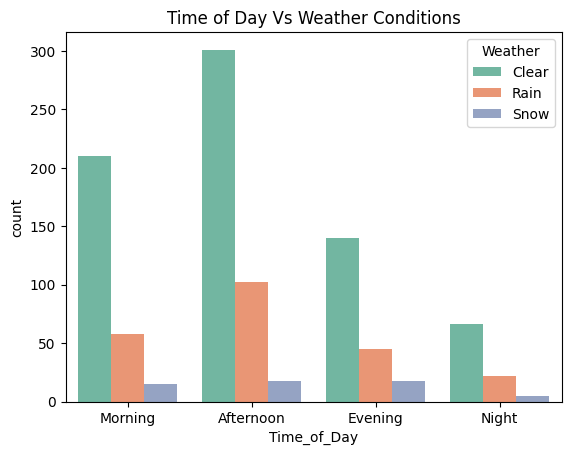

In [15]:
sns.countplot(x="Time_of_Day",hue="Weather",data=dataset,palette="Set2")
plt.title("Time of Day Vs Weather Conditions")
plt.show()

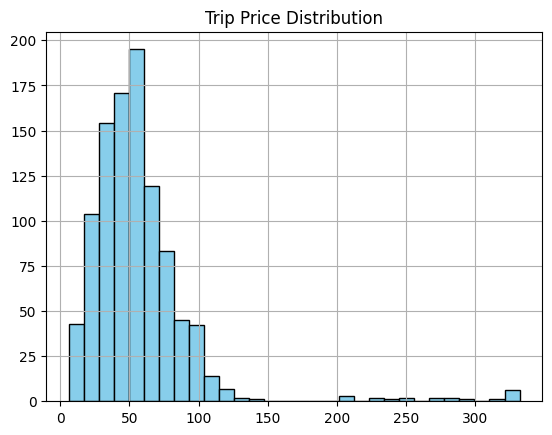

In [16]:
plt.hist(dataset['Trip_Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Trip Price Distribution')
plt.grid(True)

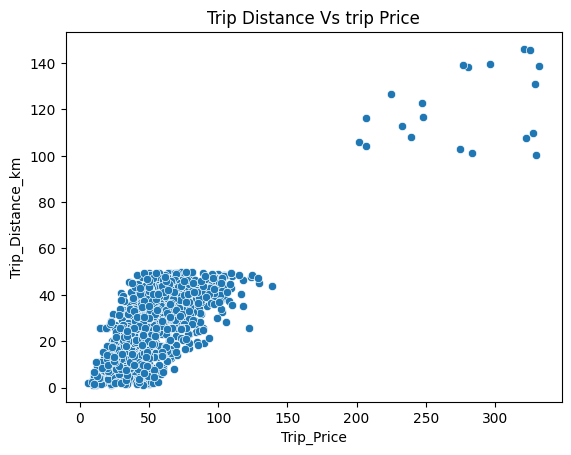

In [17]:
sns.scatterplot(x="Trip_Price",y="Trip_Distance_km",data=dataset)
plt.title("Trip Distance Vs trip Price")
plt.show()

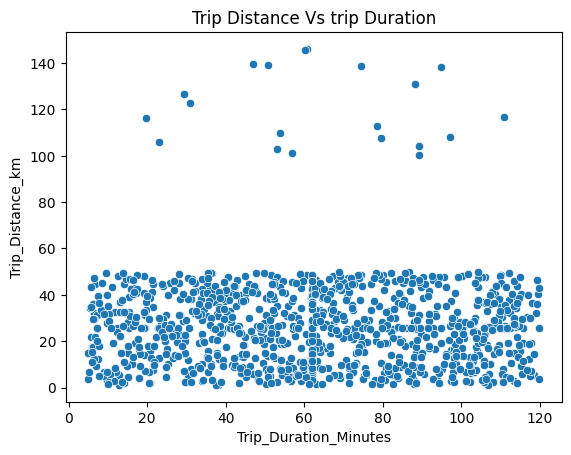

In [18]:
sns.scatterplot(x="Trip_Duration_Minutes",y="Trip_Distance_km",data=dataset)
plt.title("Trip Distance Vs trip Duration")
plt.show()

Text(0.5, 1.0, 'Trip Price Distribution by Weather Condition')

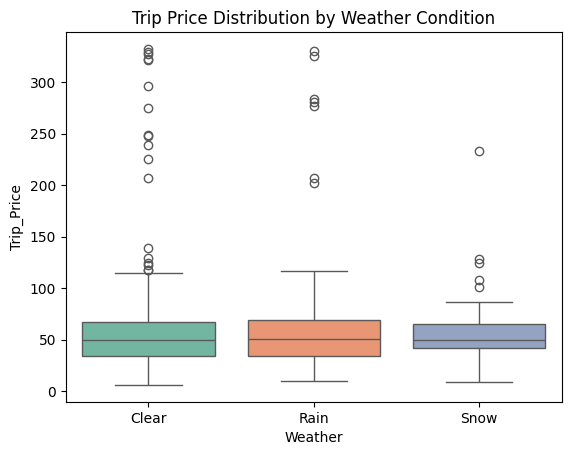

In [19]:
sns.boxplot(x='Weather', y='Trip_Price', data=dataset, palette='Set2')
plt.title('Trip Price Distribution by Weather Condition')


In [20]:
numerical_df = dataset.select_dtypes(include=['float64', 'int64'])
numerical_df.corr()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,-0.045072,0.031812,-0.015398,-0.025494,-0.020963,0.830479
Passenger_Count,-0.045072,1.000000,0.019717,0.025258,0.028360,0.024868,-0.012468
Base_Fare,0.031812,0.019717,1.000000,0.002975,-0.018047,0.011585,0.033103
Per_Km_Rate,-0.015398,0.025258,0.002975,1.000000,0.027585,0.025636,0.256122
Per_Minute_Rate,-0.025494,0.028360,-0.018047,0.027585,1.000000,-0.022913,0.131534
Trip_Duration_Minutes,-0.020963,0.024868,0.011585,0.025636,-0.022913,1.000000,0.214669
Trip_Price,0.830479,-0.012468,0.033103,0.256122,0.131534,0.214669,1.000000


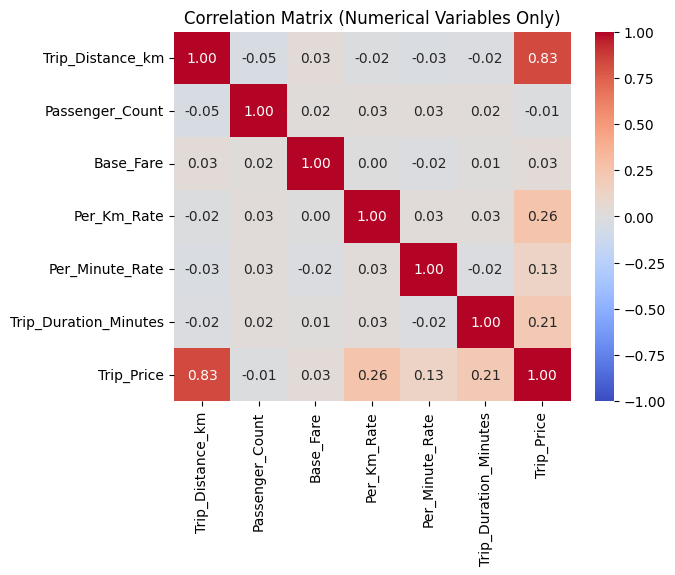

In [21]:
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

In [22]:
print(dataset['Time_of_Day'].value_counts())
print(dataset['Traffic_Conditions'].value_counts())
print(dataset['Weather'].value_counts())

Time_of_Day
Afternoon    421
Morning      283
Evening      203
Night         93
Name: count, dtype: int64
Traffic_Conditions
Low       447
Medium    371
High      182
Name: count, dtype: int64
Weather
Clear    717
Rain     227
Snow      56
Name: count, dtype: int64


Text(0.5, 1.0, 'Traffic Conditions Distribution')

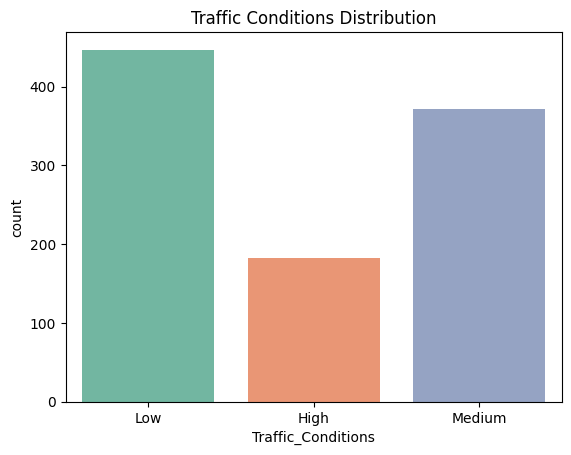

In [23]:
sns.countplot(x='Traffic_Conditions', data=dataset, palette='Set2')
plt.title('Traffic Conditions Distribution')

Text(0.5, 1.0, 'Weather Distribution')

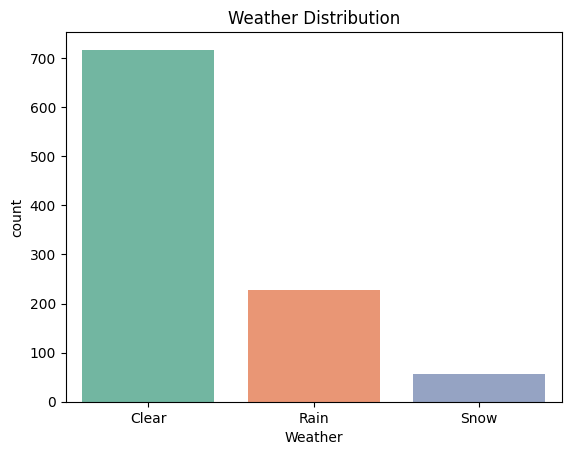

In [24]:
sns.countplot(x='Weather', data=dataset, palette='Set2')
plt.title('Weather Distribution')

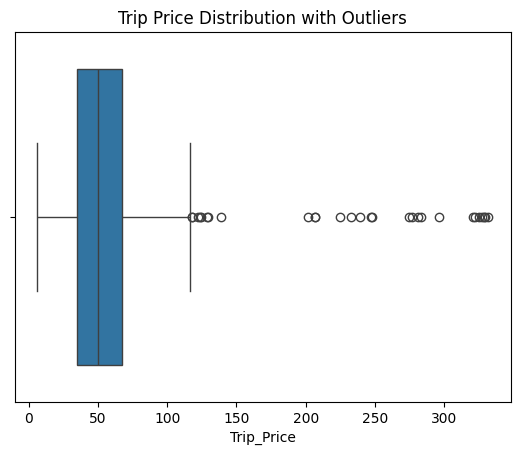

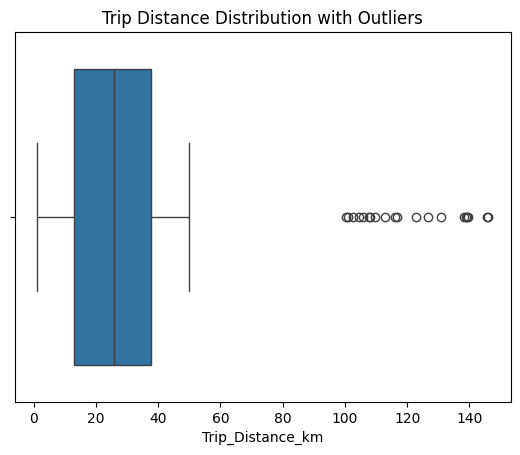

In [25]:
sns.boxplot(x='Trip_Price', data=dataset)
plt.title('Trip Price Distribution with Outliers')
plt.show()

sns.boxplot(x='Trip_Distance_km', data=dataset)
plt.title('Trip Distance Distribution with Outliers')
plt.show()

In [26]:
Q1 = dataset['Trip_Price'].quantile(0.25)
Q3 = dataset['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['Trip_Price'] < lower_bound) | (dataset['Trip_Price'] > upper_bound)]
print(f"Aykırı değerler: {outliers}")

Aykırı değerler:      Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
22         105.943550       Night     Weekend              2.0   
27         138.098328     Evening     Weekend              4.0   
64         146.067047   Afternoon     Weekday              2.0   
108        112.830958   Afternoon     Weekday              2.0   
110        102.747556     Evening     Weekday              2.0   
141        109.616082   Afternoon     Weekday              4.0   
225        130.809001   Afternoon     Weekday              1.0   
245         46.490000   Afternoon     Weekday              3.0   
267        116.196064   Afternoon     Weekend              4.0   
268        139.062230   Afternoon     Weekday              2.0   
278         35.400000     Morning     Weekday              3.0   
287        100.380420   Afternoon     Weekday              3.0   
302        145.747060     Morning     Weekday              3.0   
338        116.667681     Morning     Weekday              

In [27]:
Q1_distance = dataset['Trip_Distance_km'].quantile(0.25)
Q3_distance = dataset['Trip_Distance_km'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance
lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

outliers_distance = dataset[(dataset['Trip_Distance_km'] < lower_bound_distance) | (dataset['Trip_Distance_km'] > upper_bound_distance)]
print(f"Aykırı mesafeler: {outliers_distance}")

Aykırı mesafeler:      Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
22         105.943550       Night     Weekend              2.0   
27         138.098328     Evening     Weekend              4.0   
64         146.067047   Afternoon     Weekday              2.0   
108        112.830958   Afternoon     Weekday              2.0   
110        102.747556     Evening     Weekday              2.0   
141        109.616082   Afternoon     Weekday              4.0   
225        130.809001   Afternoon     Weekday              1.0   
267        116.196064   Afternoon     Weekend              4.0   
268        139.062230   Afternoon     Weekday              2.0   
287        100.380420   Afternoon     Weekday              3.0   
302        145.747060     Morning     Weekday              3.0   
338        116.667681     Morning     Weekday              2.0   
410        104.371791   Afternoon     Weekday              1.0   
481        107.786832     Morning     Weekend             

In [28]:
dataset["Trip_Distance_km"].describe()

count    1000.000000
mean       27.008520
std        19.402661
min         1.230000
25%        13.107500
50%        25.830000
75%        37.782500
max       146.067047
Name: Trip_Distance_km, dtype: float64

In [29]:
median_distance = dataset['Trip_Distance_km'].median()
dataset['Trip_Distance_km'] = dataset['Trip_Distance_km'].apply(lambda x: median_distance if x in outliers_distance['Trip_Distance_km'].values else x)

In [30]:
dataset["Trip_Distance_km"].describe()

count    1000.000000
mean       25.112000
std        13.871956
min         1.230000
25%        13.107500
50%        25.830000
75%        36.727500
max        49.990000
Name: Trip_Distance_km, dtype: float64

In [39]:
dataset["Trip_Price"]=dataset["Trip_Price"].clip(lower=lower_bound,upper=upper_bound)
dataset["Trip_Price"].describe()

count    1000.000000
mean       53.302532
std        24.761083
min         6.126900
25%        34.578850
50%        50.074500
75%        67.476650
max       116.823350
Name: Trip_Price, dtype: float64

Text(0.5, 1.0, 'Trip Price Distribution by Day of the Week')

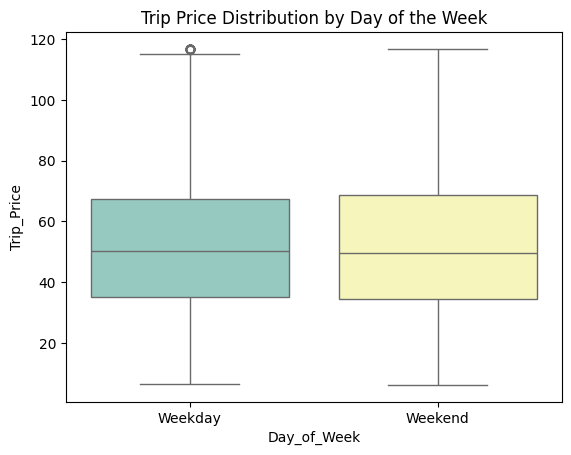

In [32]:
sns.boxplot(x='Day_of_Week', y='Trip_Price', data=dataset, palette='Set3')
plt.title('Trip Price Distribution by Day of the Week')

Text(0.5, 1.0, 'Number of Trips by Time of Day and Traffic Conditions')

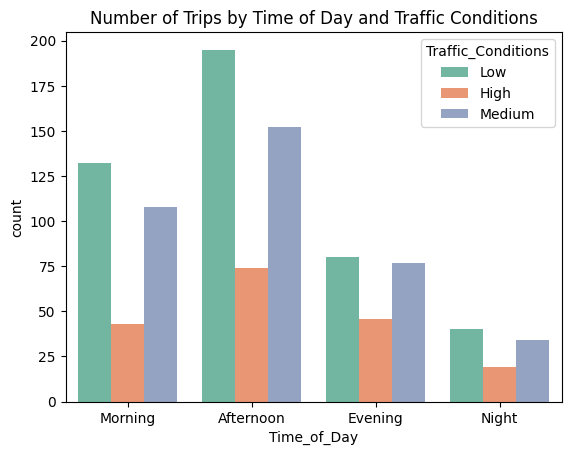

In [33]:
sns.countplot(x='Time_of_Day', hue='Traffic_Conditions', data=dataset, palette='Set2')
plt.title('Number of Trips by Time of Day and Traffic Conditions')


Text(0.5, 1.0, 'Number of Trips by Time of Day and Weather Conditions')

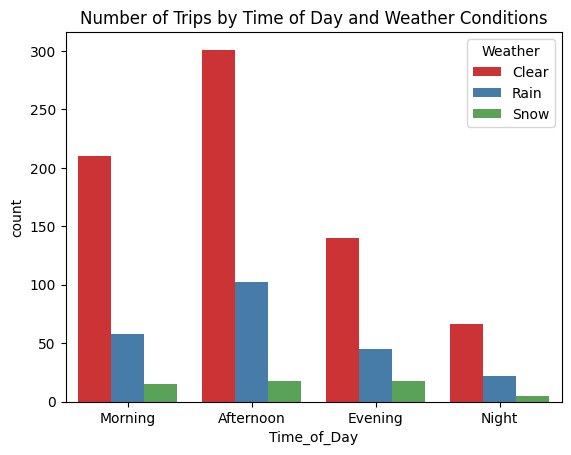

In [34]:
sns.countplot(x='Time_of_Day', hue='Weather', data=dataset, palette='Set1')
plt.title('Number of Trips by Time of Day and Weather Conditions')

In [37]:
label_encoders = {}


categorical_columns = dataset.select_dtypes(include=['object']).columns


for column in categorical_columns:
   
    original_values = dataset[column].unique()
    
 
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])
    
    
    encoded_values = dataset[column].unique()
    
    decoded_values = label_encoders[column].inverse_transform(encoded_values)
    

    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")

In [40]:
X = dataset.drop(columns=['Trip_Price']) 
y = dataset['Trip_Price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error : {mse_rf}')
print(f'R^2 Score : {r2_rf}')

Mean Squared Error : 65.69023977331322
R^2 Score : 0.8899762788674496


In [43]:
model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {linear_mse}')
print(f'R^2 Score: {linear_r2}')

Mean Squared Error: 100.59409455719066
R^2 Score: 0.8315162702201303


In [44]:
tree_model = DecisionTreeRegressor(random_state=42)


tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)

tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print(f'Mean Squared Error : {tree_mse}')
print(f'R^2 Score : {tree_r2}')

Mean Squared Error : 244.81022079058744
R^2 Score : 0.589970571646413


In [45]:
models = [ 'Random Forest','Linear Regression','Decision Tree']
mse_scores = [mse_rf,linear_mse,tree_mse]
r2_scores = [r2_rf,linear_r2,tree_r2]

results_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R^2 ': r2_scores
})


print(results_df)

               Model         MSE      R^2 
0      Random Forest   65.690240  0.889976
1  Linear Regression  100.594095  0.831516
2      Decision Tree  244.810221  0.589971
